**CLUSTERING**

In [4]:
# Load the dataset from the uploaded Excel file
import pandas as pd

# Load the 'data' sheet and use the first column as the index
excel_path =("C:\\Users\\Akram siddiqui\\documents\\ExcelR\\Data science assignments\\Clustering\\EastWestAirlines.xlsx")
df = pd.read_excel("C:\\Users\\Akram siddiqui\\documents\\ExcelR\\Data science assignments\\Clustering\\EastWestAirlines.xlsx", sheet_name="data", index_col=0)

df.head()


,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
ID#,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0
2,19244,0,1,1,1,215,2,0,0,6968,0
3,41354,0,1,1,1,4123,4,0,0,7034,0
4,14776,0,1,1,1,500,1,0,0,6952,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [5]:
df.dtypes

Balance              int64
Qual_miles           int64
cc1_miles            int64
cc2_miles            int64
cc3_miles            int64
Bonus_miles          int64
Bonus_trans          int64
Flight_miles_12mo    int64
Flight_trans_12      int64
Days_since_enroll    int64
Award?               int64
dtype: object

In [6]:
df.info

<bound method DataFrame.info of       Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
ID#                                                                       
1       28143           0          1          1          1          174   
2       19244           0          1          1          1          215   
3       41354           0          1          1          1         4123   
4       14776           0          1          1          1          500   
5       97752           0          4          1          1        43300   
...       ...         ...        ...        ...        ...          ...   
4017    18476           0          1          1          1         8525   
4018    64385           0          1          1          1          981   
4019    73597           0          3          1          1        25447   
4020    54899           0          1          1          1          500   
4021     3016           0          1          1          1          

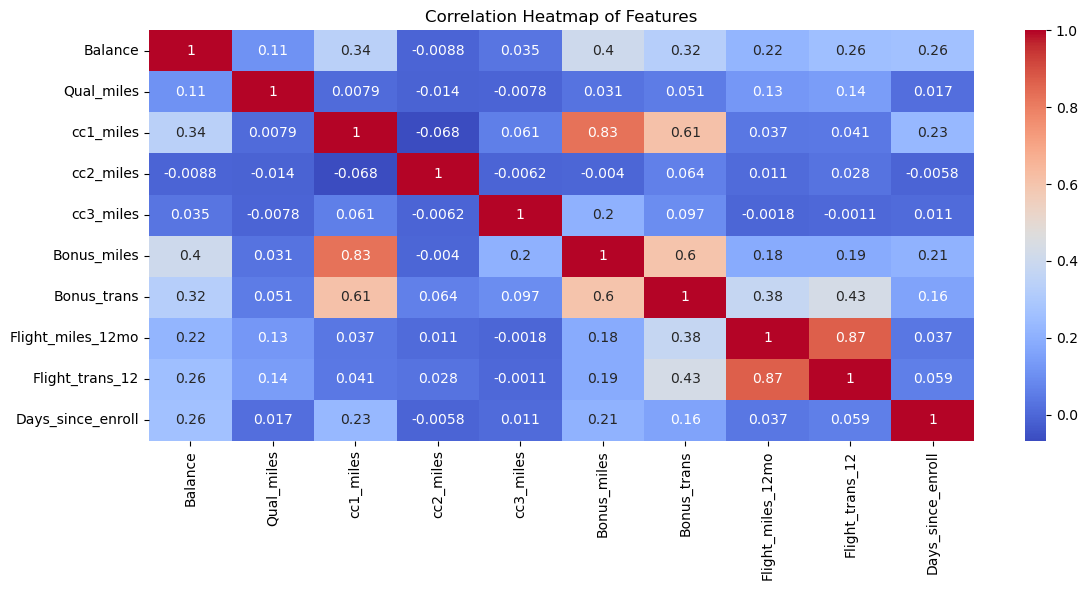

,count,mean,std,min,25%,50%,75%,max
Balance,3999.0,2.842882e-17,1.000125,-0.730440,-0.546568,-0.302733,0.186603,16.188836
Qual_miles,3999.0,6.574164e-17,1.000125,-0.186299,-0.186299,-0.186299,-0.186299,14.224863
cc1_miles,3999.0,1.705729e-16,1.000125,-0.769578,-0.769578,-0.769578,0.683121,2.135821
cc2_miles,3999.0,3.038330e-16,1.000125,-0.098242,-0.098242,-0.098242,-0.098242,13.448976
cc3_miles,3999.0,1.350369e-16,1.000125,-0.062767,-0.062767,-0.062767,-0.062767,20.427319
Bonus_miles,3999.0,-2.842882e-17,1.000125,-0.709992,-0.658228,-0.413031,0.275620,10.209570
Bonus_trans,3999.0,-7.817925e-17,1.000125,-1.208203,-0.895788,0.041457,0.562149,7.747696
Flight_miles_12mo,3999.0,0.000000e+00,1.000125,-0.328603,-0.328603,-0.328603,-0.106466,21.683004
Flight_trans_12,3999.0,1.776801e-17,1.000125,-0.362168,-0.362168,-0.362168,-0.098503,13.612053
Days_since_enroll,3999.0,5.685763e-17,1.000125,-1.993611,-0.866182,-0.010925,0.809705,2.023095


In [8]:
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Drop the 'Award?' column as it's likely a target column, not a feature for unsupervised learning
df_features = df.drop(columns=["Award?"])

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_features)

# Convert back to DataFrame for readability
scaled_df = pd.DataFrame(scaled_data, columns=df_features.columns, index=df.index)

# Generate pairplot sample and correlation heatmap
correlation = df_features.corr()

# Plot correlation heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(correlation, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Features")
plt.tight_layout()
plt.show()

scaled_df.describe().T  # Summary statistics of scaled data


In [10]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_excel("C:\\Users\\Akram siddiqui\\documents\\ExcelR\\Data science assignments\\Clustering\\EastWestAirlines.xlsx", sheet_name="data", index_col=0)

# Show the first few rows
df.head()


,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
ID#,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0
2,19244,0,1,1,1,215,2,0,0,6968,0
3,41354,0,1,1,1,4123,4,0,0,7034,0
4,14776,0,1,1,1,500,1,0,0,6952,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [11]:
# Drop 'Award?' since it's a target-like column
df_features = df.drop(columns=["Award?"])


In [12]:
# Check for missing values
df_features.isnull().sum()


Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
dtype: int64

In [13]:
# Example: Fill missing values with the column mean
df_features.fillna(df_features.mean(), inplace=True)


In [14]:
# Standardize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_features)

# Convert to DataFrame for better readability
scaled_df = pd.DataFrame(scaled_data, columns=df_features.columns, index=df.index)

# View summary statistics
scaled_df.describe()


,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
count,3.999000e+03,3.999000e+03,3.999000e+03,3.999000e+03,3.999000e+03,3.999000e+03,3.999000e+03,3999.000000,3.999000e+03,3.999000e+03
mean,2.842882e-17,6.574164e-17,1.705729e-16,3.038330e-16,1.350369e-16,-2.842882e-17,-7.817925e-17,0.000000,1.776801e-17,5.685763e-17
std,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00,1.000125,1.000125e+00,1.000125e+00
min,-7.304396e-01,-1.862987e-01,-7.695784e-01,-9.824189e-02,-6.276658e-02,-7.099918e-01,-1.208203e+00,-0.328603,-3.621679e-01,-1.993611e+00
25%,-5.465676e-01,-1.862987e-01,-7.695784e-01,-9.824189e-02,-6.276658e-02,-6.582276e-01,-8.957878e-01,-0.328603,-3.621679e-01,-8.661823e-01
50%,-3.027332e-01,-1.862987e-01,-7.695784e-01,-9.824189e-02,-6.276658e-02,-4.130308e-01,4.145743e-02,-0.328603,-3.621679e-01,-1.092530e-02
75%,1.866028e-01,-1.862987e-01,6.831212e-01,-9.824189e-02,-6.276658e-02,2.756198e-01,5.621492e-01,-0.106466,-9.850333e-02,8.097050e-01
max,1.618884e+01,1.422486e+01,2.135821e+00,1.344898e+01,2.042732e+01,1.020957e+01,7.747696e+00,21.683004,1.361205e+01,2.023095e+00


Hierarchical Clustering

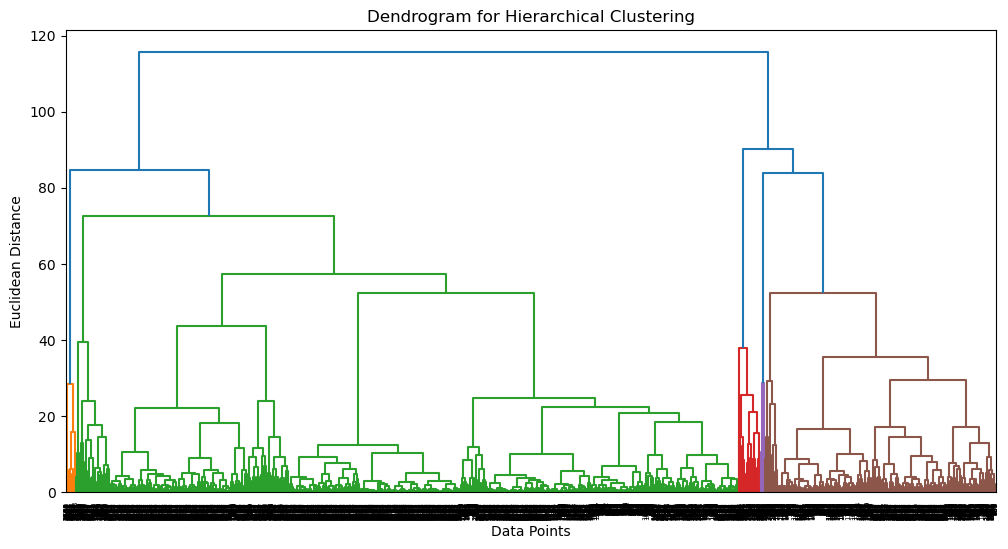

In [18]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Plot the Dendrogram
plt.figure(figsize=(12, 6))
dendrogram = sch.dendrogram(sch.linkage(scaled_df, method='ward'))
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.show()


In [23]:
from sklearn.cluster import AgglomerativeClustering

# Apply Hierarchical Clustering
hc = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
cluster_labels = hc.fit_predict(scaled_df)

# Add cluster labels to original dataframe
df['Hierarchical_Cluster'] = cluster_labels

# Display first few rows with the new cluster column
df[['Hierarchical_Cluster']].head()


,Hierarchical_Cluster
ID#,
1,0
2,0
3,0
4,0
5,1


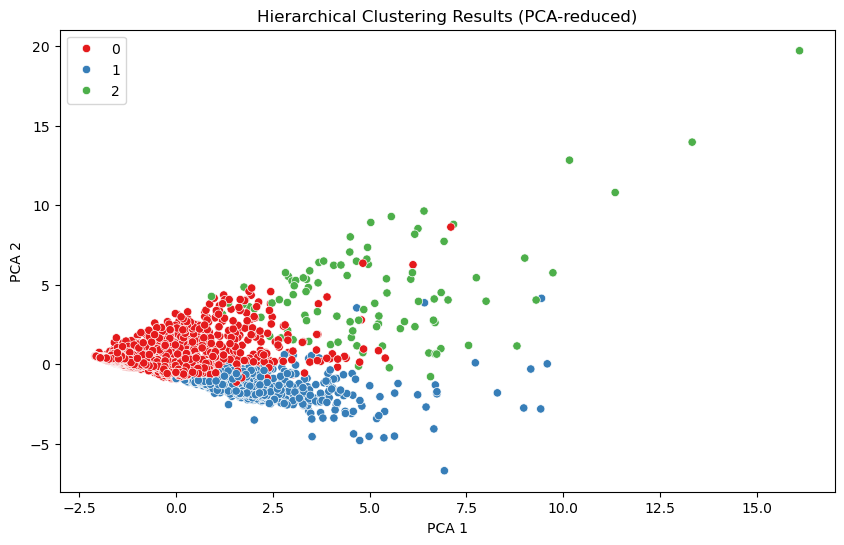

In [24]:
from sklearn.decomposition import PCA
import seaborn as sns

# Reduce dimensions for visualization
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_df)

# Plot clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=cluster_labels, palette='Set1')
plt.title('Hierarchical Clustering Results (PCA-reduced)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()


**KMeans clustering**

In [25]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


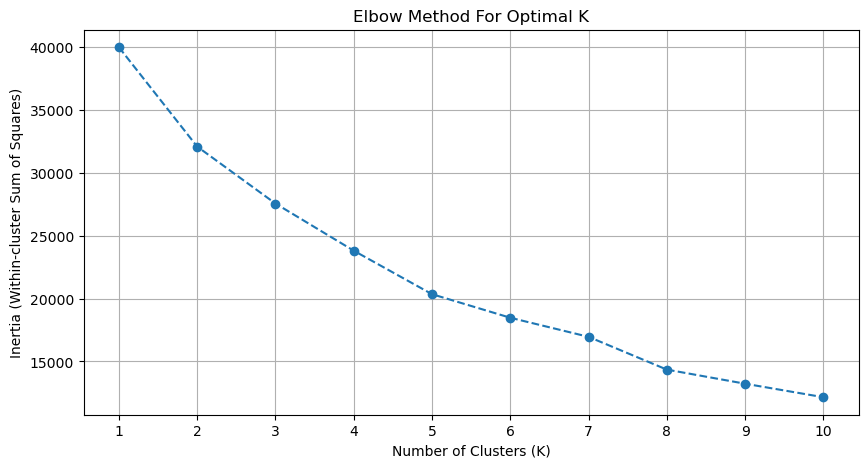

In [26]:
# List to store inertia (within-cluster sum of squares)
inertia = []

# Try K values from 1 to 10
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_df)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (Within-cluster Sum of Squares)')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()


In [27]:
# Apply KMeans with chosen K
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(scaled_df)

# Add cluster labels to original dataframe
df['KMeans_Cluster'] = kmeans_labels

# Show cluster assignments
df[['KMeans_Cluster']].head()


,KMeans_Cluster
ID#,
1,0
2,0
3,0
4,0
5,2


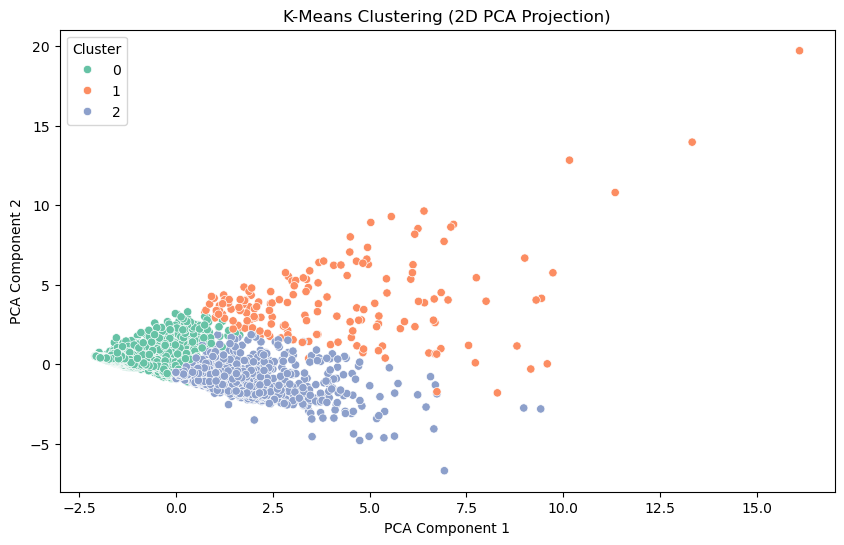

In [28]:
from sklearn.decomposition import PCA
import seaborn as sns

# Reduce dimensionality for visualization
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_df)

# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=kmeans_labels, palette='Set2')
plt.title('K-Means Clustering (2D PCA Projection)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()


In [29]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score


In [30]:
# Apply DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=5)  # You can tweak these values
dbscan_labels = dbscan.fit_predict(scaled_df)

# Add DBSCAN labels to dataframe
df['DBSCAN_Cluster'] = dbscan_labels

# Show cluster distribution
df['DBSCAN_Cluster'].value_counts()


DBSCAN_Cluster
 0    3705
-1     257
 1      22
 2      10
 3       5
Name: count, dtype: int64

In [31]:
# Only calculate silhouette score if more than 1 cluster
if len(set(dbscan_labels)) > 1:
    score = silhouette_score(scaled_df, dbscan_labels)
    print(f"Silhouette Score for DBSCAN: {score:.3f}")
else:
    print("DBSCAN resulted in only one cluster or all noise; silhouette score not applicable.")


Silhouette Score for DBSCAN: 0.568


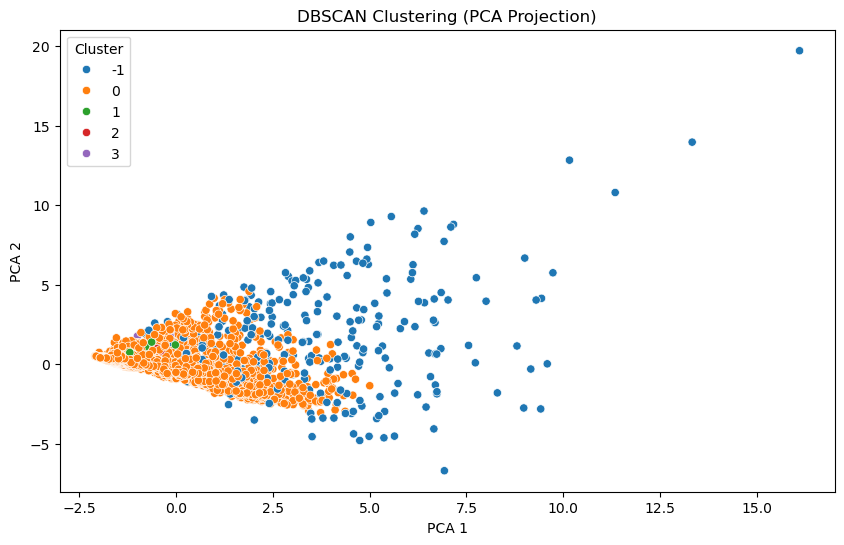

In [32]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# PCA for 2D visualization
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_df)

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=dbscan_labels, palette='tab10')
plt.title("DBSCAN Clustering (PCA Projection)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title="Cluster")
plt.show()
